# Apresentação:

    Aqui vamos estudar sobre Gradiente Descentente, que é um método
    muito útil para otimização de parâmetros utilizando técnicas de
    calculo de derivadas, cujo é bastante utilizada em Machine Learning
    como função de custo para resolução de problemas de cunho
    supervisionado, sobretudo na construção de Redes Neurais.
    
**Fontes**

1.   Cálculo (Volume 1 e 2) por James Stewart, Daniel Clegg, Saleem Watson;
2.   Metodo da Descida do Gradiente (YouTube Vídeo - https://www.youtube.com/watch?v=s0VhfvCB0Vw) por Rodrigo Guerra.

Nota:

    Nunca desmereça qualquer lugar que possa te ensinar alguma coisa,
    todo conhecimento é bem vindo!

In [1]:
# Importações:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# Definindo o Gradiente:

    O Gradiente é uma transformação que mapeia uma função no espaço
    Real n para um único número real. Ou seja, o gradiente é uma
    função que tem várias entradas, mas possui apenas uma única saída.

    Isso é fundamental para entendermos o método e sabermos quando
    devemos utiliza-lo! Se fosse um caso onde a saída fosse em Rn,
    teriamos que procurar outra solução, como o Jacobiano, por exemplo.

In [2]:
# Definindo a Função:
def funcao(x,y):
  eq = np.power(x,2)*np.sin(y)
  return eq

In [3]:
X = np.outer(np.linspace(-5.0,5.0,100),np.ones(100))
Y = np.outer(np.ones(100),np.linspace(-5.0,5.0,100))

print(X.shape)
print(Y.shape)

(100, 100)
(100, 100)


In [4]:
Z = funcao(X,Y);Z

array([[ 23.97310687,  24.56601269,  24.90848354, ..., -24.90848354,
        -24.56601269, -23.97310687],
       [ 23.01428043,  23.58347244,  23.91224585, ..., -23.91224585,
        -23.58347244, -23.01428043],
       [ 22.07502188,  22.62098404,  22.93633955, ..., -22.93633955,
        -22.62098404, -22.07502188],
       ...,
       [ 22.07502188,  22.62098404,  22.93633955, ..., -22.93633955,
        -22.62098404, -22.07502188],
       [ 23.01428043,  23.58347244,  23.91224585, ..., -23.91224585,
        -23.58347244, -23.01428043],
       [ 23.97310687,  24.56601269,  24.90848354, ..., -24.90848354,
        -24.56601269, -23.97310687]])

## Visualizações:

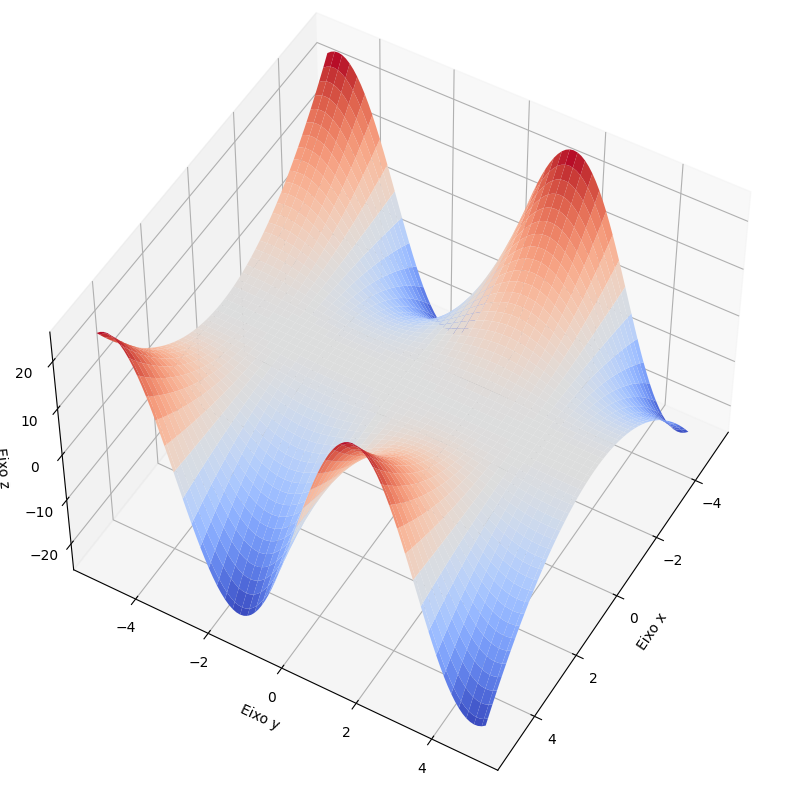

In [5]:
# Visualização Tridimensional:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.view_init(50,30)
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')
ax.set_zlabel('Eixo z')
plt.show()

Text(0, 0.5, 'Eixo y')

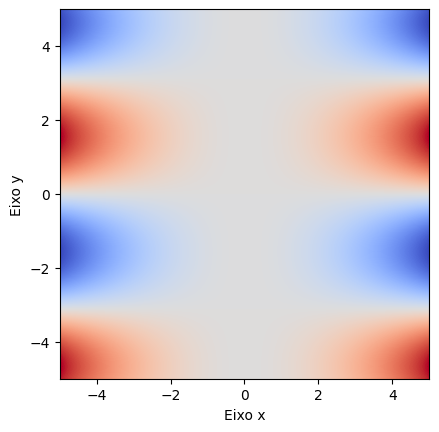

In [6]:
# Visualização bidimensional:
ax = plt.axes()
ax.imshow(-Z.T, cmap=cm.coolwarm,
          extent=(-5,5,-5,5),
          interpolation='bilinear')
ax.set_xlabel('Eixo x')
ax.set_ylabel('Eixo y')

## Calculando o Vetor Gradiente:

    O Gradiente de uma função f:Rn -> R
    é um vetor de n componentes, onde cada
    componente é a derivada parcial da
    função em relação a cada uma de suas
    entradas.

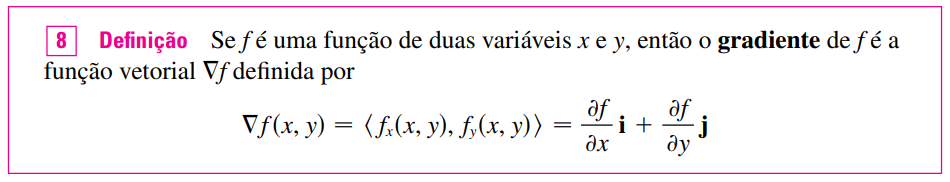

    Calcularemos o gradiene pela seguinte definição de calculo de
    derivadas, porém adotando a pespectiva multivariada.

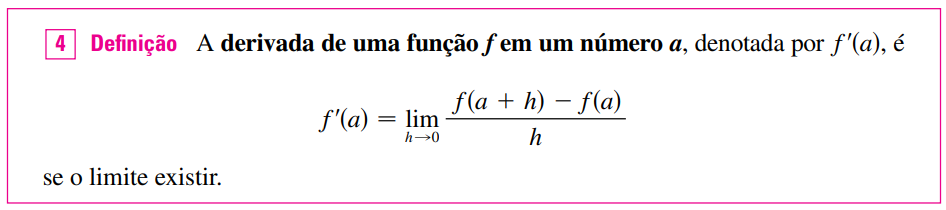

In [7]:
def grad(function,x,y):
  '''
    Função que calcula as o vetor gradiente de
  uma função, de forma numérica.
  '''

  # Calcule derivadas numéricas
  h = 1e-5  # Estimativa para o Infinitesimal:
  parcial_x = (function(x  + h, y) - function(x - h, y)) / (2 * h)
  parcial_y = (function(x, y + h) - function(x, y - h)) / (2 * h)

  return np.array([parcial_x,parcial_y])

In [8]:
grad(funcao,X,Y)

array([[[-9.58924275, -9.82640508, -9.96339342, ...,  9.96339342,
          9.82640508,  9.58924275],
        [-9.39552067, -9.62789184, -9.76211274, ...,  9.76211274,
          9.62789184,  9.39552067],
        [-9.20179859, -9.42937861, -9.56083207, ...,  9.56083207,
          9.42937861,  9.20179859],
        ...,
        [ 9.20179859,  9.42937861,  9.56083207, ..., -9.56083207,
         -9.42937861, -9.20179859],
        [ 9.39552067,  9.62789184,  9.76211274, ..., -9.76211274,
         -9.62789184, -9.39552067],
        [ 9.58924275,  9.82640508,  9.96339342, ..., -9.96339342,
         -9.82640508, -9.58924275]],

       [[ 7.09155464,  4.63799745,  2.13715881, ...,  2.13715881,
          4.63799745,  7.09155464],
        [ 6.80792139,  4.45249648,  2.05168118, ...,  2.05168118,
          4.45249648,  6.80792139],
        [ 6.53007658,  4.27078125,  1.96794799, ...,  1.96794799,
          4.27078125,  6.53007658],
        ...,
        [ 6.53007658,  4.27078125,  1.96794799, ...,  

    Deste modo temos o nosso gradiente calculado.

# Resultado

In [9]:
# Construindo os
qx, qy, qu, qv = zip(*[(xi, yi, ui, vi)
for xi in np.linspace(-1.5*np.pi, 1.5*np.pi, 15)
for yi in np.linspace(-1.5*np.pi, 1.5*np.pi, 15)
for ui, vi in [grad(funcao, xi, yi)]])

In [10]:
qx = []
qy = []
qu = []
qv = []

for xi in np.linspace(-1.5*np.pi,1.5*np.pi,15):
  for yi in np.linspace(-1.5*np.pi,1.5*np.pi,15):
    ui,vi = grad(funcao,xi,yi)
    qx.append(xi)
    qy.append(yi)
    qu.append(ui)
    qv.append(vi)

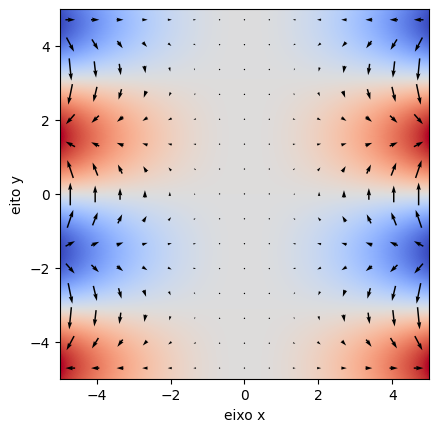

In [11]:
ax = plt.axes()
ax.imshow(-Z.T, cmap=cm.coolwarm, extent=(-5,5,-5,5), interpolation='bilinear')
Q = ax.quiver(qx,qy,qu,qv,scale=360.0, pivot='mid')
qk = ax.quiverkey(Q,0.1,0.1,0.1,"",labelpos="E", coordinates ='figure')
ax.set_xlabel('eixo x')
ax.set_ylabel('eito y')
plt.show()